# **Part 3&4: Evaluate `Cart-Pole` Agent.**

- **`Name`** : **Pavaris Asawakijtananont**

- **`Number`** : **65340500037**

> Some experiment doesn't have the same episode length depending on the behavior of learning effient in reward **[!Time limit constrain!]**

## **Linear Q Learning**

- Linear Q Learning we training with 4 difference configure including with 
**Action Range Experiment**
0. Base
1. same as Base line but reduce action range
2. Increasing learning rate and epsilon 0.001
3. Increasing only learning rate to 0.01

| ID | num_of_action | action_range       | learning_rate | initial_epsilon | epsilon_decay | final_epsilon | discount | n_episodes |
|----|---------------|--------------------|----------------|------------------|----------------|----------------|----------|-------------|
| 0  | 7             | [-25, 25]          | 0.005          | 1.0              | 0.0003         | 0.001          | 0.95     | 5000        |
| 1  | 5             | [-8, 8]            | 0.005          | 1.0              | 0.0003         | 0.001          | 0.95     | 5000        |
| 2  | 7             | [-25, 25]          | 0.01           | 1.0              | 0.001          | 0.001          | 0.95     | 2500        |
| 3  | 7             | [-25, 25]          | 0.01           | 1.0              | 0.0003         | 0.001          | 0.95     | 2500        |

#### **Epsilon**


<div style="text-align: center;">
    <img src="images\LQ_epsilon.png" alt="Description" width="1000">
</div>

- every agent must have time to exploration to find optimal policy and time to update policy in optimal
- in **Blue** line(ID 2) is fastly decay epsilon, the exploration time is less that other

#### **Reward**

<div style="display: flex; justify-content: space-around; align-items: center;">
  <div style="text-align: center;">
    <img src="images\LQ_reward_nonfilt.png" width="1000">
    <p><b>Reward over Episodes</b></p>
  </div>
  <div style="text-align: center;">
    <img src="images\LQ_reward_filter.png" width="1000">
    <p><b>Reward filter Episodes</b></p>
  </div>
</div>

- **Orange** : ID 0
- **Green** : ID 1
- **Blue** : ID 2
- **Yellow** : ID 3

- Every run have change to not learn or learn wrong, and we can see the high variance on every run and only **ID0** have trend to have learn something but only the **noisy reward** cannot indicate all the learning behavior , and filter maybe deceptive,
- but overall reward can idicate that agent doesn't learn correctly

#### **Performance**
- First of all, we will observe the deploying policy (last policy) of each experiment 

<div style="display: flex; flex-wrap: wrap; justify-content: center; gap: 20px;">

  <div style="flex: 1 1 45%; text-align: center;">
    <video width="100%" controls>
      <source src="videos/LQ_0.mp4" type="video/mp4">
    </video>
    <p><b>Video 1:  Linear Q 0</b></p>
  </div>

  <div style="flex: 1 1 45%; text-align: center;">
    <video width="100%" controls>
      <source src="videos/LQ_1.mp4" type="video/mp4">
    </video>
    <p><b>Video 2:  Linear Q 1</b></p>
  </div>

  <div style="flex: 1 1 45%; text-align: center;">
    <video width="100%" controls>
      <source src="videos/LQ_2.mp4" type="video/mp4">
    </video>
    <p><b>Video 3: Linear Q 2</b></p>
  </div>

  <div style="flex: 1 1 45%; text-align: center;">
    <video width="100%" controls>
      <source src="videos/LQ_3.mp4" type="video/mp4">
    </video>
    <p><b>Video 4: Linear Q 3</b></p>
  </div>

</div>


- we can see the only 1 agent **[ID-0]** can stabilize
- but after of some time step cart is going on right position only , but performance 

> The update behavior is quite difficult to analyze, and the learning process itself is also too complex to examine. and logging the learning process is not much difference from deploying polciy but more randomly action

#### **Why not Work?**

- CartPole’s value‑function (or Q‑function) is a highly nonlinear surface over its four‑dimensional continuous state space. A simple linear combination of raw observations can’t capture the sharp “cliff” regions where a small change in state radically changes the best action.
- Function approximation: using a parameterized, generalizing model (here linear)
- Off‑policy learning: Q‑learning bootstraps on maxₐ Q(s′, a) regardless of which action was actually taken
- Bootstrapping: updating estimates based on other estimates (i.e. temporal‑difference updates)
When all three are combined, the updates can become unstable or even diverge. In CartPole, small errors in Q‑value estimates get amplified through the TD(0) bootstrap, and the linear weights swing wildly rather than converging.

##### **Linearlization work in `Control` not `RL`**
- Control and Reinforcement learning we have the same objective to stabilize cartpole but
    - In control system we use `reference point` to control and compensate the error to stabilize cart pole with high frequency, that which make linearization work in small angles throught we using linear controller 
    - but in Reinforcement Learning we cannot learn with high frequency envrironment and Reinforcement learning is base-on **`Reward Hypothesis`** not the **Reference** as Control system do, so weight in policy is stepping forward with a gradient to learn something not instance like control system 

##### **Complexity of Approximator**
- At previous session I said "in policy is stepping forward with a gradient to learn something" but why it not learn, because of we approximate with linear layer which only contain weight and only 4 term (4 observation) per action that **not enough** to approximate non-linearity to environment to stabilize the cart
- In Ordinary Q Learning work with cartpole cause of Ordinary cartpole not approximate the action with linearity method but updating with tabular method, and when we discrete state it like we add non-linearity to approximate state and updating seperate each state by not independent to each other

#### **Summary**
- Linear Q Learning is the one approach to handle with continuous space and stepping with gredient descent, using observation term as direction of gradient, but still have a problem with less complexity to approximate the action value
- Linear Q Learning is simple model it may work with the linear problem not like cartpole

## **DQN**

- we testing on DQN with 4 configuration
0. Base
1. Increasing batch size
2. Reducing Learning rate
3. Reducing Learning rate 

<div style="overflow-x:auto;">
  <table border="1" cellpadding="6" cellspacing="0">
    <thead>
      <tr>
        <th>ID</th>
        <th>num_of_action</th>
        <th>action_range_min</th>
        <th>action_range_max</th>
        <th>hidden_dim</th>
        <th>dropout</th>
        <th>learning_rate</th>
        <th>tau</th>
        <th>initial_epsilon</th>
        <th>epsilon_decay</th>
        <th>final_epsilon</th>
        <th>discount</th>
        <th>buffer_size</th>
        <th>batch_size</th>
        <th>n_episodes</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>0</td>
        <td>7</td>
        <td>-25</td>
        <td>25</td>
        <td>64</td>
        <td>0.0</td>
        <td>0.001</td>
        <td>0.005</td>
        <td>1.0</td>
        <td>0.001</td>
        <td>0.001</td>
        <td>0.95</td>
        <td>1048</td>
        <td>256</td>
        <td>2000</td>
      </tr>
      <tr>
        <td>1</td>
        <td>7</td>
        <td>-25</td>
        <td>25</td>
        <td>64</td>
        <td>0.0</td>
        <td>0.001</td>
        <td>0.005</td>
        <td>1.0</td>
        <td>0.001</td>
        <td>0.001</td>
        <td>0.95</td>
        <td>1048</td>
        <td>512</td>
        <td>2000</td>
      </tr>
      <tr>
        <td>2</td>
        <td>7</td>
        <td>-25</td>
        <td>25</td>
        <td>64</td>
        <td>0.0</td>
        <td>0.0005</td>
        <td>0.005</td>
        <td>1.0</td>
        <td>0.001</td>
        <td>0.001</td>
        <td>0.95</td>
        <td>1048</td>
        <td>256</td>
        <td>5000</td>
      </tr>
      <tr>
        <td>3</td>
        <td>7</td>
        <td>-25</td>
        <td>25</td>
        <td>64</td>
        <td>0.0</td>
        <td>0.0001</td>
        <td>0.005</td>
        <td>1.0</td>
        <td>0.001</td>
        <td>0.001</td>
        <td>0.95</td>
        <td>1048</td>
        <td>256</td>
        <td>5000</td>
      </tr>
    </tbody>
  </table>
</div>


### **Loss**
- for loss behavior in DQN is quite a increasing to somepoint then decreasing converge to zero , the increasing is from agent has learn something new from there experience and get more rewards than before, following the equation that using MSE loss from maximum action value given next state and action value given current state, and decreasign from Agent is know the bad action from their experience and try to optimize loss with gradient descest to exploit more reward 

<div style="text-align: center;">
    <img src="images\DQN_loss.png" alt="Description" width="1000">
</div>

- **Blue** : ID 0
- **Pink** : ID 1
- **Yellow** : ID 2
- **Green** : ID 3

- all the loss value is same to each other , except the **Green** (ID3) one , that have higher loss value and slow converge to other 
- This behavior is explained by the fact that ID3 uses the smallest learning rate of all configurations. With a lower step size, the agent makes more conservative updates, so it takes longer to drive its loss down and reach the same level of convergence as the other runs.

### **Reward**
- reward value is cumutive reward per episode , the value for every experiments is noisy too
- and trend of reward value is most learn faster get higher reward but agent is not stable to get higher reward all the time, every model have lower reward after exploration (episode 1000)
- but the green one (lowest learning rate) can't exploit the reward so this might be the effect of learning rate that have too low value that make agent not learn to do anything

<div style="display: flex; justify-content: space-around; align-items: center;">
  <div style="text-align: center;">
    <img src="images\DQN_reward_not.png" width="1000">
    <p><b>Reward over Episodes</b></p>
  </div>
  <div style="text-align: center;">
    <img src="images\DQN_reward_filter.png" width="1000">
    <p><b>Reward filter Episodes</b></p>
  </div>
</div>

#### **Performance**
- All of agent is can't perform with learning method *see more in problem*

#### **Problem**

##### **Neural Network Layer**
- Bad Design neural network 

In my code is forwarding wrong that last layer is **`ReLu`** this leading to agent clamping only Positive value this can leading to bad update on policy

```python
    def forward(self, x):
        """ Forward pass through the network."""
        val = x
        val = F.relu(self.fc1(val))
        val = self.dropout(val)
        val = F.relu(self.fc2(val))
        val = self.dropout(val)

        return val
```

- from equation can see the **`ReLu`** is clamping the value on positive value, but in update equation in DQN, TD target

$$
r + \gamma \max_{a} Q(s',a)
$$

- can legitimately be negative (e.g. when rewards are negative or the discount term is small). If your network can never predict a negative Q, it will systematically overshoot its targets and produce biased updates.

- so the correct one is must be

```python
    def forward(self, x):
        """ Forward pass through the network."""
        val = x
        val = F.relu(self.fc1(val))
        val = self.dropout(val)
        val = self.fc2(val)
        val = self.dropout(val)
        return val
```

#### **Changing Layer**

  <div style="flex: 1 1 45%; text-align: center;">
    <video width="50%" controls>
      <source src="videos/DQN2.mp4" type="video/mp4">
    </video>
  </div>

- DQN performance is not good 

## **MC REINFORCE**

| ID | num_of_action | action_range_min | action_range_max | hidden_dim | dropout | learning_rate | discount | n_episodes |
|----|---------------|------------------|------------------|------------|---------|---------------|----------|------------|
| 0  | 7             | -25              | 25               | 64         | 0.0     | 0.0001        | 0.95     | 2000       |
| 1  | 7             | -25              | 25               | 32         | 0.0     | 0.0001        | 0.95     | 2000       |
| 2  | 7             | -25              | 25               | 64         | 0.0     | 0.001         | 0.95     | 2000       |
| 3  | 7             | -25              | 25               | 64         | 0.0     | 0.004         | 0.95     | 2000       |
| 4  | 7             | -25              | 25               | 64         | 0.0     | 0.002         | 0.95     | 2000       |
| 5  | 7             | -25              | 25               | 64         | 0.0     | 0.0025        | 0.95     | 5000       |
| 6  | 7             | -25              | 25               | 64         | 0.0     | 0.0025        | 0.90     | 5000       |


#### **Problem**

##### **Neural Network Layer**
- Bad Design neural network (Again) **ผมพึ่งเห็นก่อนส่ง 2 ชม. ว่ามันแปลก ๆ ;-; ผลที่เก็บมาเลยแปลก ๆ หมดเลย**

In my code is forwarding wrong that last layer is **`ReLu`** this leading to agent clamping only Positive value this can leading to bad update on policy
```python
   def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.softmax(x)
        return x
```

- `What happens`: Any raw score (logit) that your second linear layer would have produced below zero gets set to 0.

- `Consequence` : Softmax only ever sees inputs in [0, ∞). A genuine “strong dislike” (say, logit = −5) becomes 0, exactly the same as a neutral preference (logit = 0). Your network loses the ability to represent negative preference for an action.

- `Gradient impact` : Wherever self.fc2(x) was negative, the ReLU kills the gradient entirely (backprop through a negative input to ReLU is zero). Those weights effectively stop learning if they ever go negative.
- `Potential dead‑zones`: Actions whose logits get clamped to zero stop receiving gradient signals if they ever go negative, so they may never recover to become better choices.

```python
   def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        logits = self.fc2(x)
        return self.softmax(logits)
```

**Althroug** that is a bad neural network for training but we can see the behavior some thing in REINFORCE


### **Correct One**

#### **Loss**


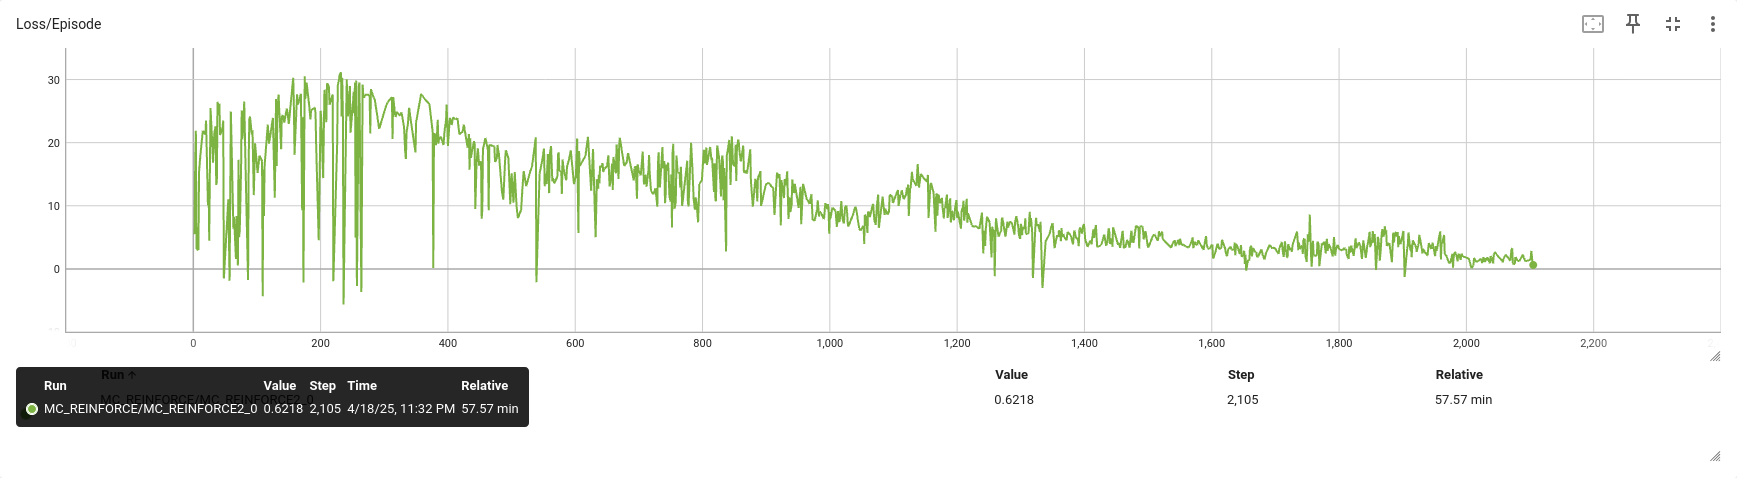

#### **Reward**


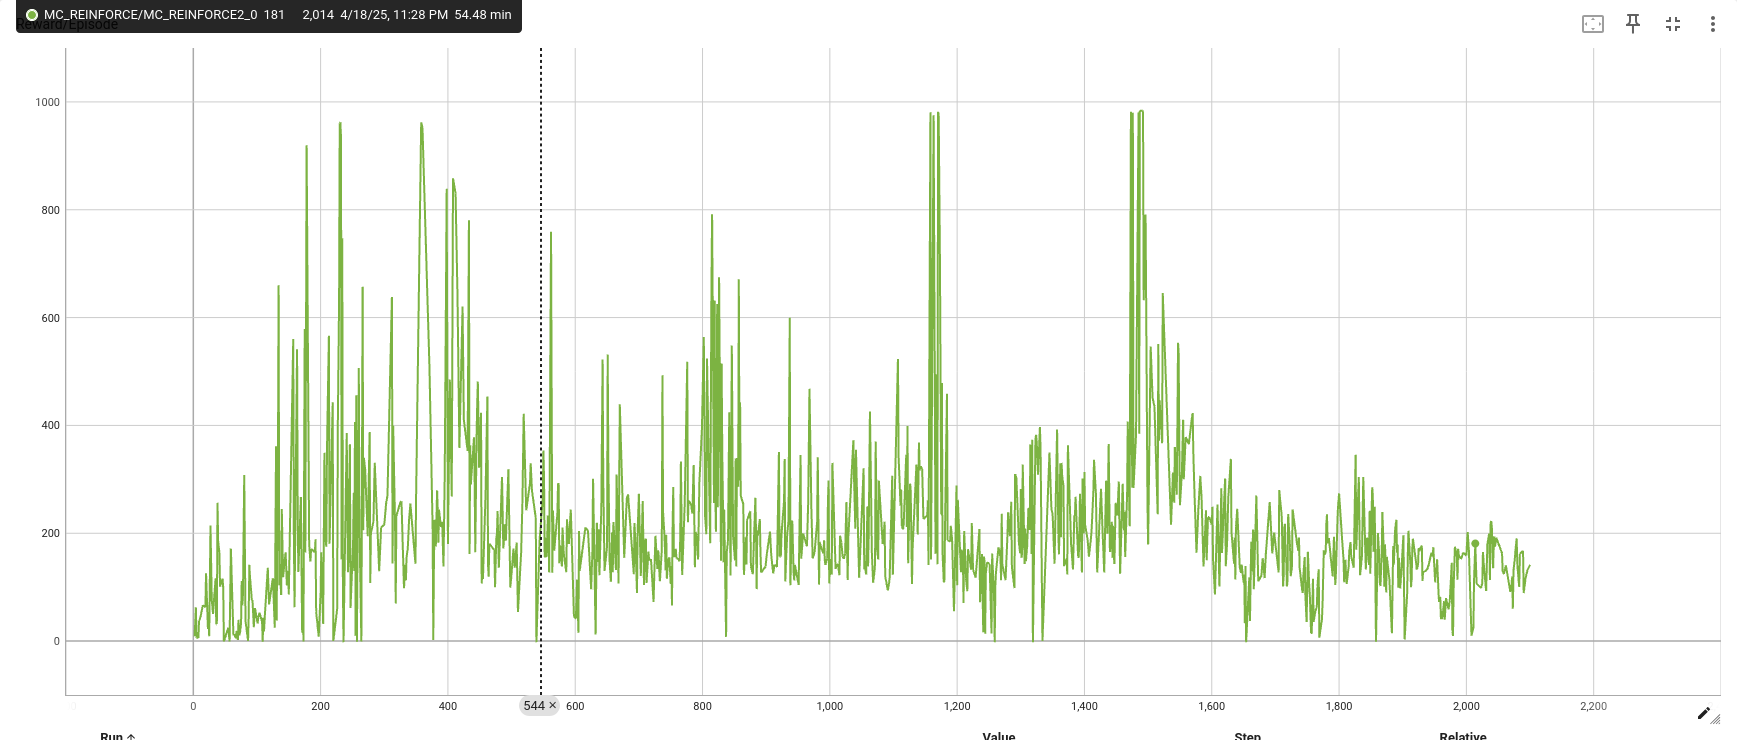

- noise of reward is very high this correct to the thoery that from sample technique

  <div style="flex: 1 1 45%; text-align: center;">
    <video width="50%" controls>
      <source src="videos/MC_REINFORCE2_0.mp4" type="video/mp4">
    </video>
  </div>

- Performance of learning in MC REINFORCE is very swing and can change many time from high variance but from deploying performance it look like to struct at local optima

## **PPO**

3 6 7 and 
- every experiment is running of 

<div style="overflow-x:auto;">
  <table border="1" cellpadding="6" cellspacing="0">
    <thead>
      <tr>
        <th>ID</th>
        <th>num_of_action</th>
        <th>action_range</th>
        <th>learning_rate</th>
        <th>hidden_dim</th>
        <th>n_episodes</th>
        <th>discount</th>
        <th>batch_size</th>
        <th>num_envs</th>
        <th>eps</th>
        <th>critic_loss_coeff</th>
        <th>entropthy_loss_coeff</th>
        <th>lambda</th>
        <th>maxstep</th>
        <th>buffer_size</th>
        <th>des</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>0</td>
        <td>7</td>
        <td>[-25, 25]</td>
        <td>0.0001</td>
        <td>64</td>
        <td>2000</td>
        <td>0.95</td>
        <td>512</td>
        <td>1048</td>
        <td>0.2</td>
        <td>0.5</td>
        <td>0.1</td>
        <td>1</td>
        <td>512</td>
        <td>512</td>
        <td>reduce learning rate</td>
      </tr>
      <tr>
        <td>1</td>
        <td>7</td>
        <td>[-25, 25]</td>
        <td>0.00025</td>
        <td>64</td>
        <td>2000</td>
        <td>0.95</td>
        <td>512</td>
        <td>1048</td>
        <td>0.2</td>
        <td>0.5</td>
        <td>0.01</td>
        <td>1</td>
        <td>512</td>
        <td>512</td>
        <td>reduce learning rate to 0.0005</td>
      </tr>
      <tr>
        <td>3</td>
        <td>7</td>
        <td>[-25, 25]</td>
        <td>0.0002</td>
        <td>64</td>
        <td>2000</td>
        <td>0.95</td>
        <td>512</td>
        <td>1048</td>
        <td>0.2</td>
        <td>0.5</td>
        <td>0.01</td>
        <td>1</td>
        <td>512</td>
        <td>512</td>
        <td>reduce learning rate to 0.0001</td>
      </tr>
      <tr>
        <td>4</td>
        <td>7</td>
        <td>[-25, 25]</td>
        <td>0.0002</td>
        <td>64</td>
        <td>5000</td>
        <td>0.95</td>
        <td>512</td>
        <td>64</td>
        <td>0.2</td>
        <td>0.5</td>
        <td>0.01</td>
        <td>1</td>
        <td>512</td>
        <td>512</td>
        <td>reduce learning rate to 0.0002</td>
      </tr>
    </tbody>
  </table>
</div>


#### **Reward**
- for reward term of PPO agent all value is converge to the reward every agent 

- **Blue** : 0
- **Yellow** : 1
- **Black** : 3
- **Orange** : 4 [5000 episode]

<div style="display: flex; justify-content: space-around; align-items: center;">
  <div style="text-align: center;">
    <img src="images\PPO_reward_not.png" width="1000">
    <p><b>Reward over Episodes</b></p>
  </div>
  <div style="text-align: center;">
    <img src="images\PPO_reward_filt.png" width="1000">
    <p><b>Reward filter Episodes</b></p>
  </div>
</div>

- in reward value in PPO have all the same trend,
- increase rate depend on learning rate 

#### **Loss**

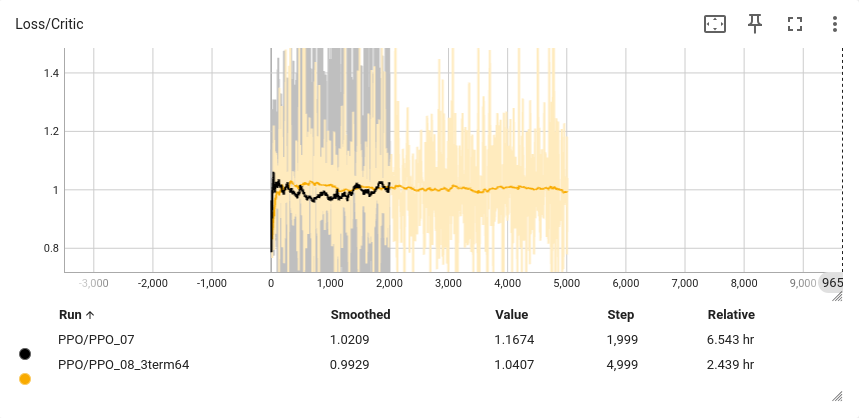

- All loss value is a low value from calculating from PPO loss that contain with 3 term but 3 term is clipping and use min before to final loss
- but the loss value must increasing at first and slowly converge to zero like DQN but this term is not converge and very spiky

**3 Term of Loss**

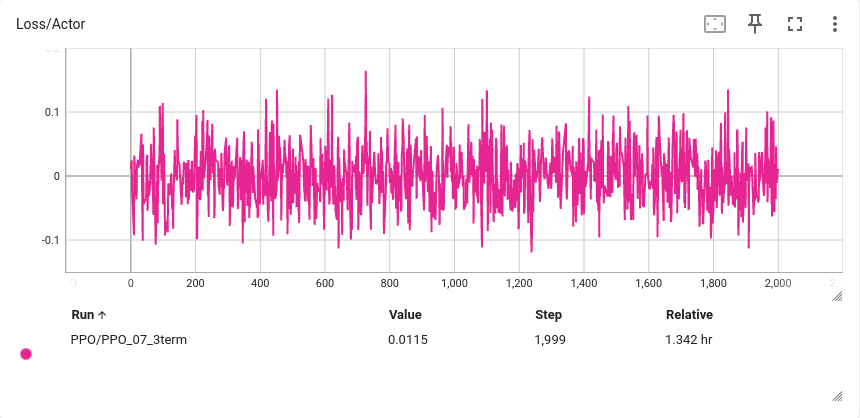

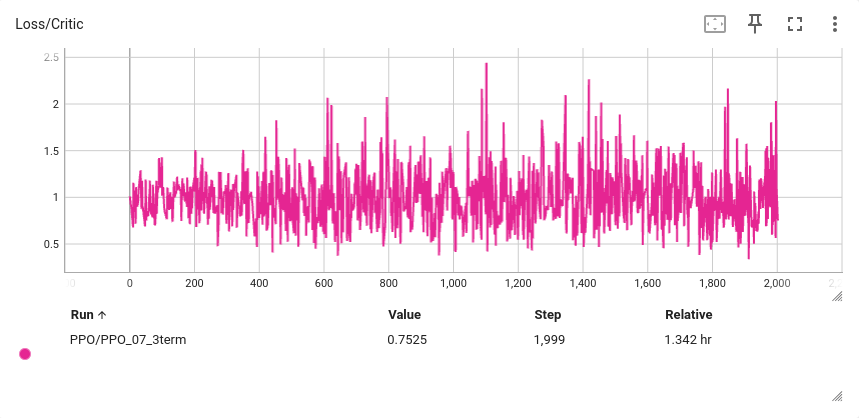

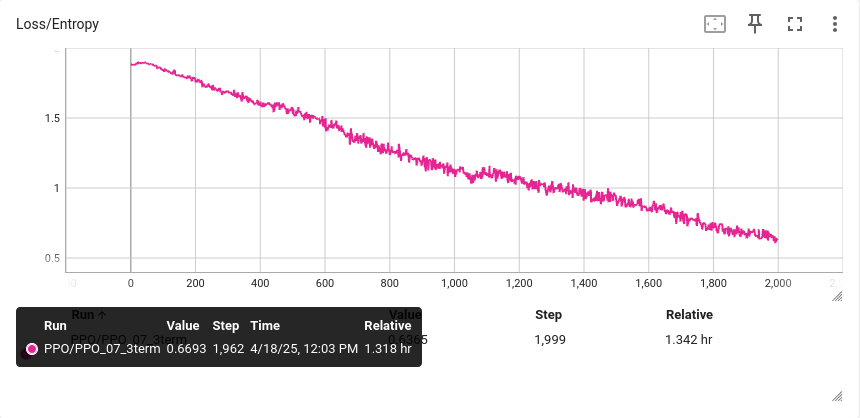

- if we look deeply in 3 term of loss **ID4** we can found the actor loss is nearly  zero bound
    - this actor loss can effect from advantage , log probability ratio this indicate that have a high variance on action
        - If your estimated advantage AA is positive, PPO encourages ratio ↑ until clipped. If AA is negative, it encourages ratio ↓ until clipped.
        - When one batch has mixed advantage signs or is noisy, you’ll see alternating upward/downward gradient pushes—another source of “spikiness.”
    - for critic loss is direcly effect from critic network or state value and advantage
        - the learning for critic is may be too high
        - to calculate advantage we using GAE with $\lambda = 1$ this make too noisy value 
    - for entropy bonus is converging into zeros that is make sense becuase of when updating policy everystep probability of action must have less entropy

#### **Number of Agent**
- for Cartpole agent is small space number of agent is not effect much on environment but with higher agent this can bring more experience and more variance on agent
- with higher space multi agent will effect too much for the training 
- with many agent will bring more data but we much trade off with computational resource to use sample efficient 

#### **Performance**
- for performance of PPO is same as other, so I will example the ID4 that train with 64 agent

  <div style="flex: 1 1 45%; text-align: center;">
    <video width="50%" controls>
      <source src="videos/PPO_08.mp4" type="video/mp4">
    </video>
  </div>

**Summary**
- Stable updates via a clipped surrogate objective: limits how much the new policy can diverge from the old one each update.
- Exploration encouraged by adding an entropy bonus to the actor loss, keeping the policy sufficiently random.
- Low‐variance advantage estimates using Generalized Advantage Estimation (GAE) for smoother, more reliable gradients.

## **Problems**

### **Local Minima** !!!!!
- The agent is converge to local minima or not optimal solution but agent can't converge to global minima to get optimal policy , this can cause from too low learning rate or something else 
- you still can see in other agent is have same behavior that reward not increasing over time
- for this case the agent is not stabilize at center as well as everyone know that the optimal solution is stabilize at center, but most of all agent and algorithm is most slide to side way
- if we look at reward term we can see the penalty term of **terminating** and **cart_vel , pole_vel**
- and behavior of agent is slide to side to terminate this can indicate that agent have learn to **get terminate penalty before get velocity penalty** or agent is learn to get long term penalty before short term penalty
- Action space to environment is maybe too high that make agent may get too high penalty compare as terminating penalty 

```python
class RewardsCfg:
    """Reward terms for the MDP."""

    # (1) Constant running reward
    alive = RewTerm(func=mdp.is_alive, weight=1.0)
    # (2) Failure penalty
    terminating = RewTerm(func=mdp.is_terminated, weight=-2.0)
    # (3) Primary task: keep pole upright
    pole_pos = RewTerm(
        func=mdp.joint_pos_target_l2,
        weight=-1.0,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["cart_to_pole"]), "target": 0.0},
    )
    # (4) Shaping tasks: lower cart velocity
    cart_vel = RewTerm(
        func=mdp.joint_vel_l1,
        weight=-0.01,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["slider_to_cart"])},
    )
    # (5) Shaping tasks: lower pole angular velocity
    pole_vel = RewTerm(
        func=mdp.joint_vel_l1,
        weight=-0.005,
        params={"asset_cfg": SceneEntityCfg("robot", joint_names=["cart_to_pole"])},
    )
```

- to solve this problem
    - may be increase terminating penalty
    - decreasing / delete velocity penalty

- Example of local minima in while training in REINFORCE algorithm, the reward value is instant spring up to max or se can say the agent is can stabilize until timeout ,but after the episode all the reward value is instant downfall.
- In policy‐gradient methods like REINFORCE, you often see runs where the episodic return suddenly “shoots up”—the agent by chance discovers a trajectory that yields near‐max reward—and then immediately collapses back down on subsequent episodes. This pattern is a classic sign of getting stuck in a local minimum (or really, a local optimum in policy‐space) combined with high gradient variance. 

**Reward Graph**

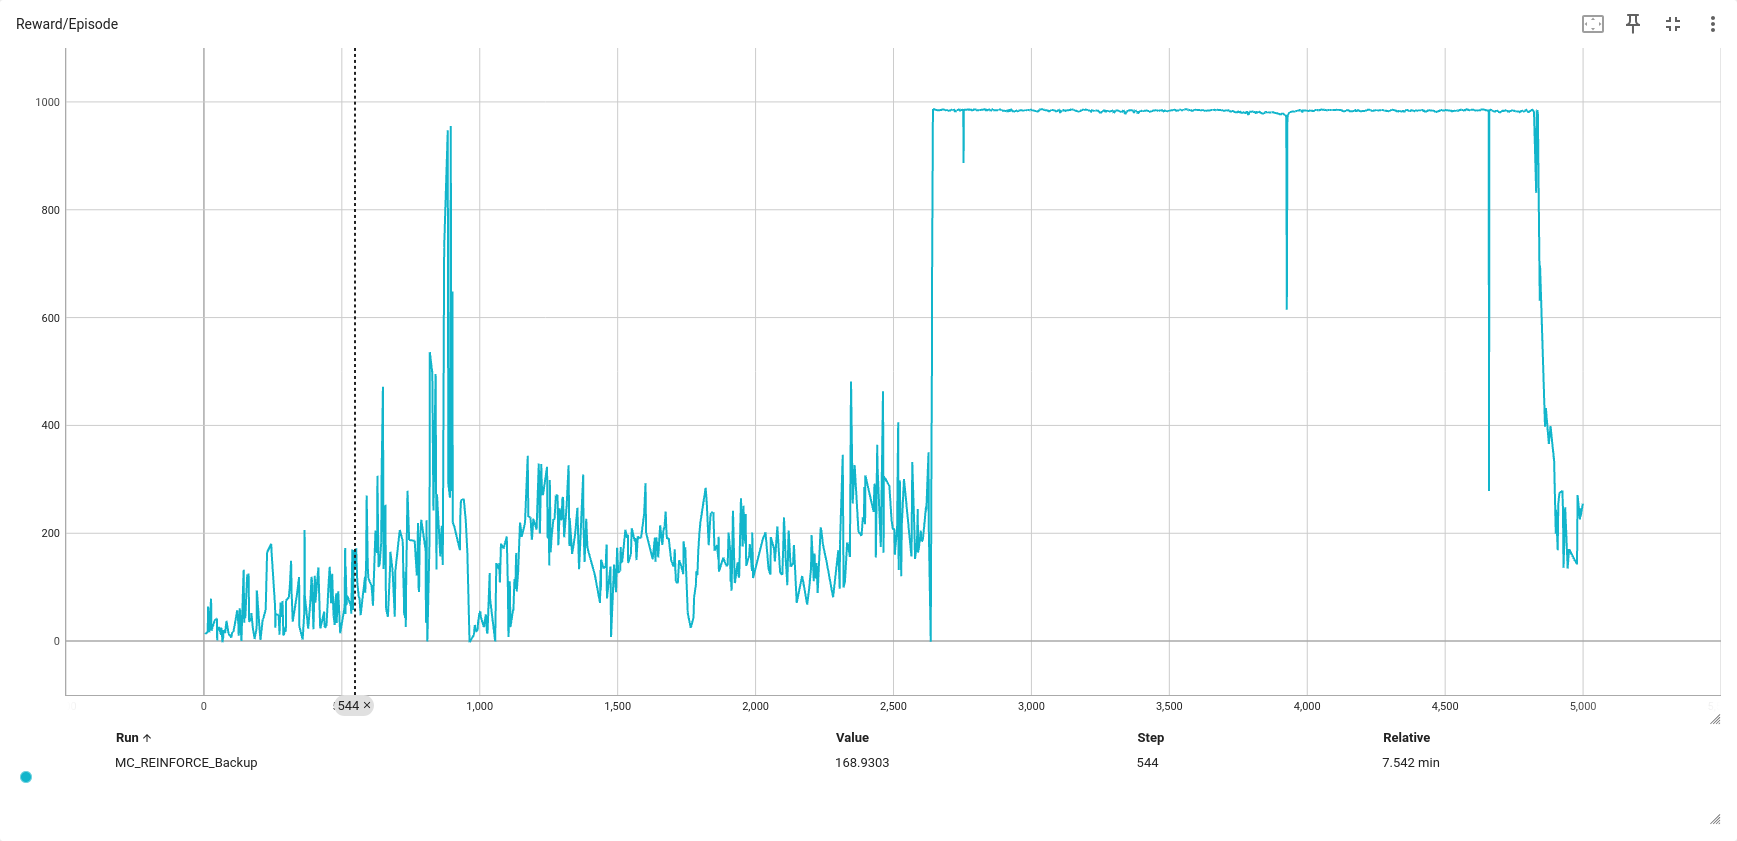

## **Summary**
- PPO (Actor–Critic) topped the experiments. Its clipped surrogate objective and entropy bonus give it more stable, efficient updates than pure policy‑gradient or Q‑learning methods.
- Dual‑network (Actor + Critic) reduces variance. By using the critic’s value estimate as a baseline, PPO subtracts a learned “expected return” from each trajectory’s advantage, cutting gradient noise and speeding convergence.